In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
import tensorflow as tf
from tensorflow.keras import models,backend
from keras.optimizers import SGD
from keras.layers import Flatten, Dense
from keras.datasets import cifar10

In [3]:
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()

In [4]:
xtrain.shape

(50000, 32, 32, 3)

In [5]:
ytrain.shape

(50000, 1)

In [6]:
#normalization berween [0,1]
xtrain,xtest = xtrain/255.0,xtest/255.0

In [7]:
#one hot encoding
ytrain = tf.keras.utils.to_categorical(ytrain,10)
ytest = tf.keras.utils.to_categorical(ytest,10)

In [8]:
ytrain.shape

(50000, 10)

In [9]:
model = models.Sequential(
    [
        Flatten(input_shape = (32,32,3)),
        Dense(128,activation = 'relu'),
        Dense(128,activation = 'relu'),
        Dense(128,activation = 'relu'),
        Dense(128,activation = 'relu'),
        Dense(64,activation = 'relu'),
        Dense(64,activation = 'relu'),
        Dense(10,activation = 'softmax')
    ]
)

D:\nakul\PICT\sem7\DL\DLenv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer = SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(xtrain,ytrain,epochs=10,batch_size=32,validation_data=(xtest,ytest))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1926 - loss: 2.1507 - val_accuracy: 0.3257 - val_loss: 1.8510
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3468 - loss: 1.8184 - val_accuracy: 0.3702 - val_loss: 1.7377
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3841 - loss: 1.7071 - val_accuracy: 0.3921 - val_loss: 1.6840
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4098 - loss: 1.6390 - val_accuracy: 0.3525 - val_loss: 1.7995
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4330 - loss: 1.5842 - val_accuracy: 0.4166 - val_loss: 1.5925
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4478 - loss: 1.5392 - val_accuracy: 0.4208 - val_loss: 1.6318
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4605 - loss: 1.5008 - val_accuracy: 0.4353 - val_loss: 1.5644
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4707 - loss: 1.4759 - 

In [12]:
test_loss,test_acc = model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4725 - loss: 1.4511


In [13]:
test_loss

1.465848445892334

In [15]:
test_acc

0.4657999873161316

In [16]:
ytest = np.argmax(ytest,1)

In [17]:
ypred = model.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
ypred = np.argmax(ypred,axis=1)

In [19]:
csr = classification_report(ytest,ypred)

In [20]:
print(csr)

              precision    recall  f1-score   support

           0       0.56      0.48      0.52      1000
           1       0.54      0.70      0.61      1000
           2       0.37      0.29      0.33      1000
           3       0.31      0.41      0.35      1000
           4       0.48      0.28      0.35      1000
           5       0.52      0.20      0.29      1000
           6       0.36      0.77      0.49      1000
           7       0.66      0.42      0.51      1000
           8       0.57      0.68      0.62      1000
           9       0.54      0.43      0.48      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



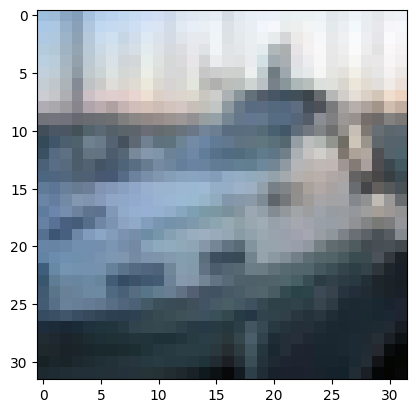

In [37]:
plt.imshow(xtest[2])
plt.show()

In [38]:
print(ypred[1])

8


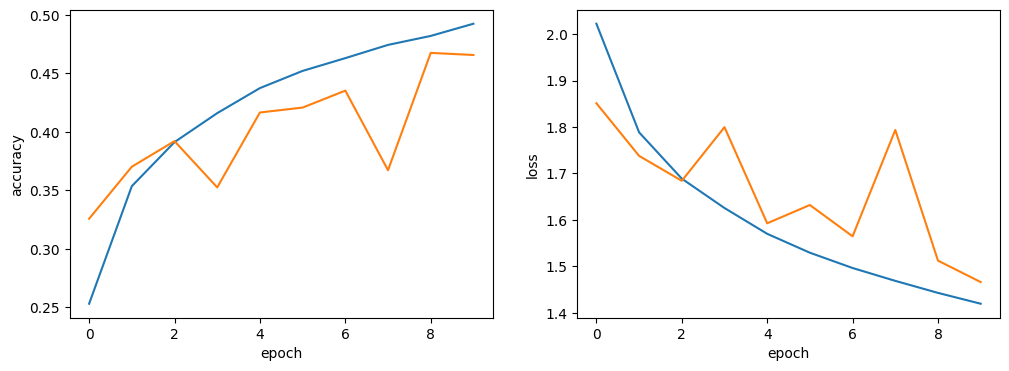

In [39]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.show()